In [21]:
# Step 1 - Libraries and data upload
import pandas as pd
import numpy as np

# Step 1.1 - Reading CSV file
df = pd.read_csv("agua_superficial_4.csv")
print("Dimensiones:", df.shape)
df.head(5)


Dimensiones: (2764, 30)


,Unnamed: 0,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,...,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_D_48_FON_UT,TOX_FIS_SUP_15_UT,TOX_FIS_FON_15_UT,SEMAFORO
0,0,DLAGU11,PRESA JOCOQUI 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,SAN JOSE DE GRACIA,RIO SAN PEDRO,PRESA EL JOCOQUI,LENTICO,PRESA,...,170.5,106.4,50.2,NaN,NaN,1.0,1.0,1.00,1.00,Rojo
1,1,DLAGU12,PRESA EL JOCOQUI COLA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,SAN JOSE DE GRACIA,RIO SAN PEDRO,PRESA EL JOCOQUI,LENTICO,PRESA,...,180.0,105.1,48.1,NaN,NaN,1.0,1.0,1.14,1.25,Rojo
2,2,DLAGU13,PRESA PRESIDENTE CALLES 100M AGUAS ARRIBA DE L...,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,SAN JOSE DE GRACIA,PRESA CALLES,PRESA PRESIDENTE CALLES,LENTICO (HUMEDAL),PRESA,...,117.5,45.4,12.8,NaN,NaN,1.0,1.0,1.00,1.00,Amarillo
3,3,DLAGU14,PRESA PRESIDENTE CALLES EMBARCADERO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,SAN JOSE DE GRACIA,PRESA CALLES,PRESA PRESIDENTE CALLES,LENTICO (HUMEDAL),PRESA,...,109.4,50.8,12.6,NaN,NaN,1.0,1.0,1.00,1.00,Amarillo
4,4,DLAGU15,PRESA PRESIDENTE CALLES TECONGO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,SAN JOSE DE GRACIA,PRESA CALLES,PRESA PRESIDENTE CALLES,LENTICO (HUMEDAL),PRESA,...,101.7,42.8,14.6,NaN,NaN,1.0,1.0,1.00,1.00,Amarillo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2764 non-null   int64  
 1   CLAVE                2764 non-null   object 
 2   SITIO                2764 non-null   object 
 3   ORGANISMO_DE_CUENCA  2764 non-null   object 
 4   ESTADO               2764 non-null   object 
 5   MUNICIPIO            2764 non-null   object 
 6   CUENCA               2762 non-null   object 
 7   CUERPO DE AGUA       2750 non-null   object 
 8   TIPO                 2764 non-null   object 
 9   SUBTIPO              2750 non-null   object 
 10  LONGITUD             2764 non-null   float64
 11  LATITUD              2764 non-null   float64
 12  PERIODO              2764 non-null   int64  
 13  DBO_mg/L             2382 non-null   float64
 14  DQO_mg/L             2382 non-null   float64
 15  SST_mg/L             2760 non-null   f

<Axes: >

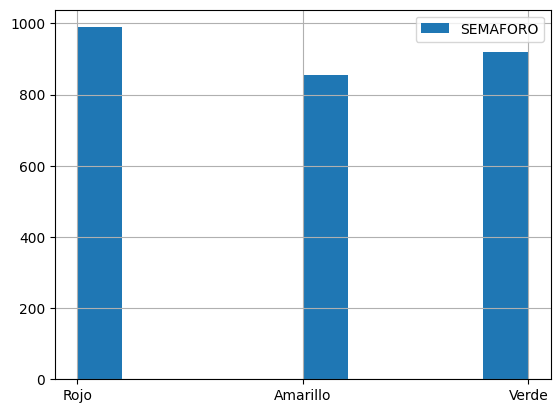

In [22]:
# Step 2 - Data analysis

df.info()
df["SEMAFORO"].hist(legend=True)

In [24]:
# Step 2.1 - Defining non-predictive columns
no_predictoras = [
    'Unnamed: 0', 'CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA',
    'ESTADO', 'MUNICIPIO', 'CUENCA', 'CUERPO DE AGUA',
    'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO'
]

# Step 2.2 - Defining X and y
X = df.drop(columns=no_predictoras + ['SEMAFORO'])
y = df['SEMAFORO']


**Justification for dropping non-predictive columns :**

Unnamed: 0: Automatic index without informational value.

CLAVE and SITIO: Site identifiers that could introduce spatial or temporal biases not generalizable.

ORGANISMO_DE_CUENCA: Administrative code lacking intrinsic information regarding water quality.

ESTADO and MUNICIPIO: Geographic variables more relevant for descriptive analysis than predictive modeling.

CUENCA, CUERPO DE AGUA, TIPO, and SUBTIPO: Classification metadata posing a risk of information leakage.

LONGITUD and LATITUD: Geographic coordinates excluded to avoid geospatial components at this stage.

PERIODO: Temporal marker omitted to focus the model exclusively on physicochemical parameters.

In [25]:
# Step 3 - Data preparation

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Step 3.1 - Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Step 3.2 - Numeric pipeline and missing data handling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Step 3.3 - Applying transformers
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, X.columns.tolist())
])


In [26]:
# Step 4 - Training models
# Evaluating Logistic Regression, Random Forest y Gradient Boosting

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    'LogisticRegression': {
        'estimator': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'model__C': [0.01, 0.1, 1, 10],
            'model__penalty': ['l2'],
            'model__solver': ['lbfgs']
        }
    },
    'RandomForest': {
        'estimator': RandomForestClassifier(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [None, 10, 20]
        }
    },
    'GradientBoosting': {
        'estimator': GradientBoostingClassifier(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 5]
        }
    }
}


In [27]:
# Step 5 - Hyperparameter Tuning with Cross-Validation
# Using GridSearchCV with cv=5, optimizing the F1 score for the "Verde" class:

from sklearn.model_selection      import GridSearchCV, StratifiedKFold
from sklearn.metrics              import make_scorer, f1_score
import numpy as np

def f1_verde_binario(y_true, y_pred):
    # 1 = Verde, 0 = cualquier otra etiqueta
    y_true_bin = np.where(y_true == "Verde", 1, 0)
    y_pred_bin = np.where(y_pred == "Verde", 1, 0)
    return f1_score(y_true_bin, y_pred_bin, zero_division=0)

f1_verde = make_scorer(f1_verde_binario)

# Stratified CV strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_estimators = {}
for name, mdl in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model',        mdl['estimator'])
    ])
    grid = GridSearchCV(
        estimator   = pipe,
        param_grid  = mdl['params'],
        scoring     = f1_verde,
        cv          = skf,
        n_jobs      = -1,
        verbose     = 1,
        error_score = 0
    )
    grid.fit(X_train, y_train)
    best_estimators[name] = {
        'best_score_cv':    grid.best_score_,
        'best_params':      grid.best_params_,
        'best_estimator':   grid.best_estimator_
    }
    print(f"\nModel: {name}")
    print(f" – Best F1 score (Verde) with CV (5-fold): {grid.best_score_:.3f}")
    print(f" – Optimal Parameters: {grid.best_params_}")
    print("────────────────────────────────────────")

# Final test evaluation
from sklearn.metrics import f1_score

for name, info in best_estimators.items():
    est    = info['best_estimator']
    y_pred = est.predict(X_test)
    f1_tst = f1_score(
        np.where(y_test=="Verde",1,0),
        np.where(y_pred=="Verde",1,0),
        zero_division=0
    )
    print(f"{name} — F1 Score (Verde) in test: {f1_tst:.3f}")




Fitting 5 folds for each of 4 candidates, totalling 20 fits

Model: LogisticRegression
 – Best F1 score (Verde) with CV (5-fold): 0.660
 – Optimal Parameters: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
────────────────────────────────────────
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Model: RandomForest
 – Best F1 score (Verde) with CV (5-fold): 0.979
 – Optimal Parameters: {'model__max_depth': None, 'model__n_estimators': 200}
────────────────────────────────────────
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Model: GradientBoosting
 – Best F1 score (Verde) with CV (5-fold): 0.988
 – Optimal Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
────────────────────────────────────────
LogisticRegression — F1 Score (Verde) in test: 0.655
RandomForest — F1 Score (Verde) in test: 0.993
GradientBoosting — F1 Score (Verde) in test: 0.995


**Conclusion:**

Among the three trained models, I would select Gradient Boosting as the final solution for classifying water quality in Mexican water bodies. It achieved the highest F1 score both in cross-validation (0.988) and on the test dataset (0.995), slightly outperforming Random Forest (0.979 in CV and 0.993 in test), and clearly surpassing Logistic Regression (0.660 in CV and 0.655 in test). Although the difference is small, it becomes significant in a public health context, where minimizing false negatives ("agua insegura" classified as "Verde") can have serious consequences. Gradient Boosting achieves the optimal balance between precision and recall for the "Verde" class. Additionally, its ability to model complex interactions and non-linear relationships among physicochemical parameters justifies the modest increase in computational cost compared to Random Forest, ensuring maximum reliability in detecting safe water.